## Titanic Dataset

 - `PassengerId` -- A numerical id assigned to each passenger.
 - `Survived` -- Whether the passenger survived (1), or didn't (0).
 - `Pclass` -- The class the passenger was in -- first class (1), second class (2), or third class (3).
 - `Name` -- the name of the passenger.
 - `Sex` -- The gender of the passenger -- male or female.
 - `Age` -- The age of the passenger. Fractional.
 - `SibSp` -- The number of siblings and spouses the passenger had on board.
 - `Parch` -- The number of parents and children the passenger had on board.
 - `Ticket` -- The ticket number of the passenger.
 - `Fare` -- How much the passenger paid for the ticker.
 - `Cabin` -- Which cabin the passenger was in.
 - `Embarked` -- Where the passenger boarded the Titanic.

## Goals of the exercise

- understand the factors related to survival
- train a machine learninf model to predict survival: it is a binariy classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set the color palette
sns.set_palette(sns.color_palette("husl"))

## Load the Data and Explore

In [54]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.shape

(891, 12)

In [10]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Charts and aggregations to understand the data**

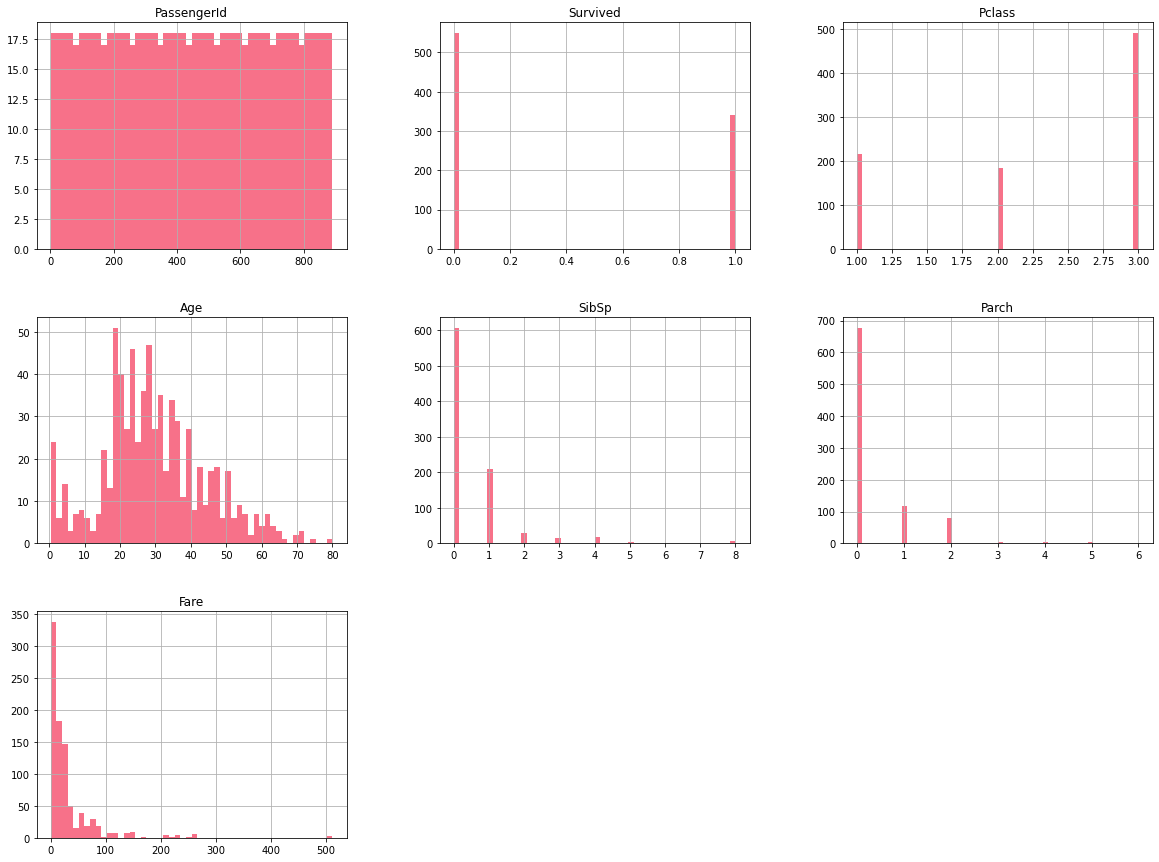

In [19]:
titanic.hist(bins=50, figsize=(20,15))
plt.show()

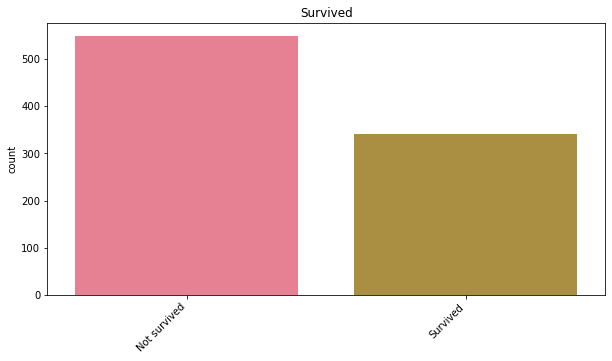

In [20]:
# n° of survivors 
labels = ['Not survived', 'Survived']
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=titanic, x=titanic['Survived'],ax=ax)
ax.set_title('Survived')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(labels)
ax.set(xlabel=None);

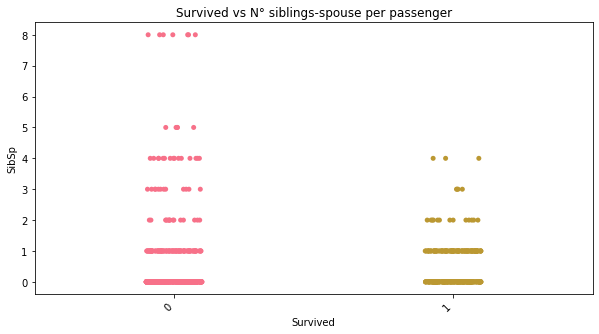

In [21]:
# survived vs n° siblings- spouse per passenger
fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(data=df, x=titanic['Survived'], y=titanic['SibSp'],ax=ax)
ax.set_title('Survived vs N° siblings-spouse per passenger')
plt.xticks(rotation=45, ha='right');

**Check if Duplicates are Present**

In [15]:
titanic[titanic.duplicated(keep='first')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Check if NaN Values are Present**

In [18]:
titanic.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Survived vs Sex**

In [22]:
# n° of survivors per sex
titanic.groupby(['Sex', 'Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

## Data Cleaning

**Handling Missing Data**

Before training a machine learning model missing data have to be handled.

- missing data reduces the power of statistical methods
- missing data can introduce bias to the model
- many machine learning packages in python do not accept missing data

**Non-numeric columns**

Non-numeric columns have to be excluded before training a machine learning algorithm or converted to numerical g.g `Sex` and `Embarked`.

Columns that don't add information could be dropped.

What is OneHot encoding?

**OneHOt Encoding**


Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors.This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements.

In [52]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()


In [56]:
embarked = titanic[['Embarked']]
embarked.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [57]:
embarked_1hot = cat_encoder.fit_transform(embarked)
embarked_1hot

<891x4 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

The output is a SciPy sparse matrix, instead of a NumPy array. It can be used mostly like a normal 2D array,21 but if we want to convert it to a (dense) NumPy array, we can do that by calling the toarray() method:

In [58]:
embarked_1hot.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

**Converting Sex type into Boolean**

In [26]:
def convert_sex_boolean(row):
    if 'female' in str(row):
        return 1
    else:
        return 0

In [60]:
titanic['Sex'] = df['Sex'].apply(convert_sex_boolean)

In [61]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


**Check for Correlation of the Data**

In [32]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

**Replace the Missing Age with the Median Age**

In [62]:
median_age = titanic['Age'].median()  
titanic["Age"].fillna(median_age, inplace=True)

**Drop All Unrelated Columns**

In [63]:
titanic.drop('Cabin', axis=1, inplace = True)


In [64]:
titanic.drop('Embarked', axis=1, inplace = True)


In [65]:
titanic.drop('Ticket', axis=1, inplace = True)

In [66]:
titanic.drop('Name', axis=1, inplace = True)

In [120]:
titanic.drop('PassengerId', axis=1, inplace = True)

In [121]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [122]:
titanic.isna().sum()/len(df)*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
dtype: float64

**Data Cleaning Pipeline**

In [71]:
#pass

**Classes to predict: check for class imbalance**

In a machine learning model the variable to predict is `Survived`. It is important to check the number of individuals that belong to each category to see if there is a class imbalance.

In [123]:
# percentage of survivors
df['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

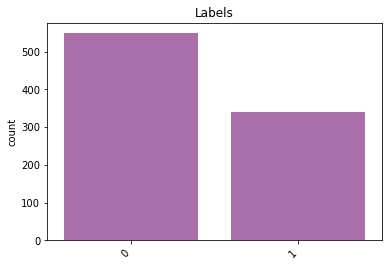

In [306]:
ax = sns.countplot(data = df, x='Survived', color='purple', alpha=0.6)
ax.set_title('Labels')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set(xlabel=None);

## Predictive Model

As a predictive model I will train a `DecisionTreeClassifier` because of the following advantages:
- it is capable of fitting complex datasets
- it doesn't require feature scaling or centering
- it is a nonparametric model: it makes few assumptions about the training data, the number of parameters is not determined prior to training

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [124]:
#feature
titanic_prepared = titanic.drop(columns=['Survived']).values
titanic_prepared

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [125]:
# label
titanic_prepared_label = titanic['Survived'].values
titanic_prepared_label


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [132]:

# split dataset in train and test sets
titanic_train, titanic_test, titanic_label_train, titanic_label_test = train_test_split(titanic_prepared, titanic_prepared_label, test_size=0.33, random_state=42)

In [133]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(titanic_train, titanic_label_train)

DecisionTreeClassifier(max_depth=4)

**Visualizing the Decision Tree**

In [127]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [128]:
feature_columns= titanic.drop(columns=['Survived']).columns
feature_columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [166]:
tree_clf.feature_importances_

array([0.18481356, 0.56154827, 0.11745719, 0.0427021 , 0.        ,
       0.09347887])

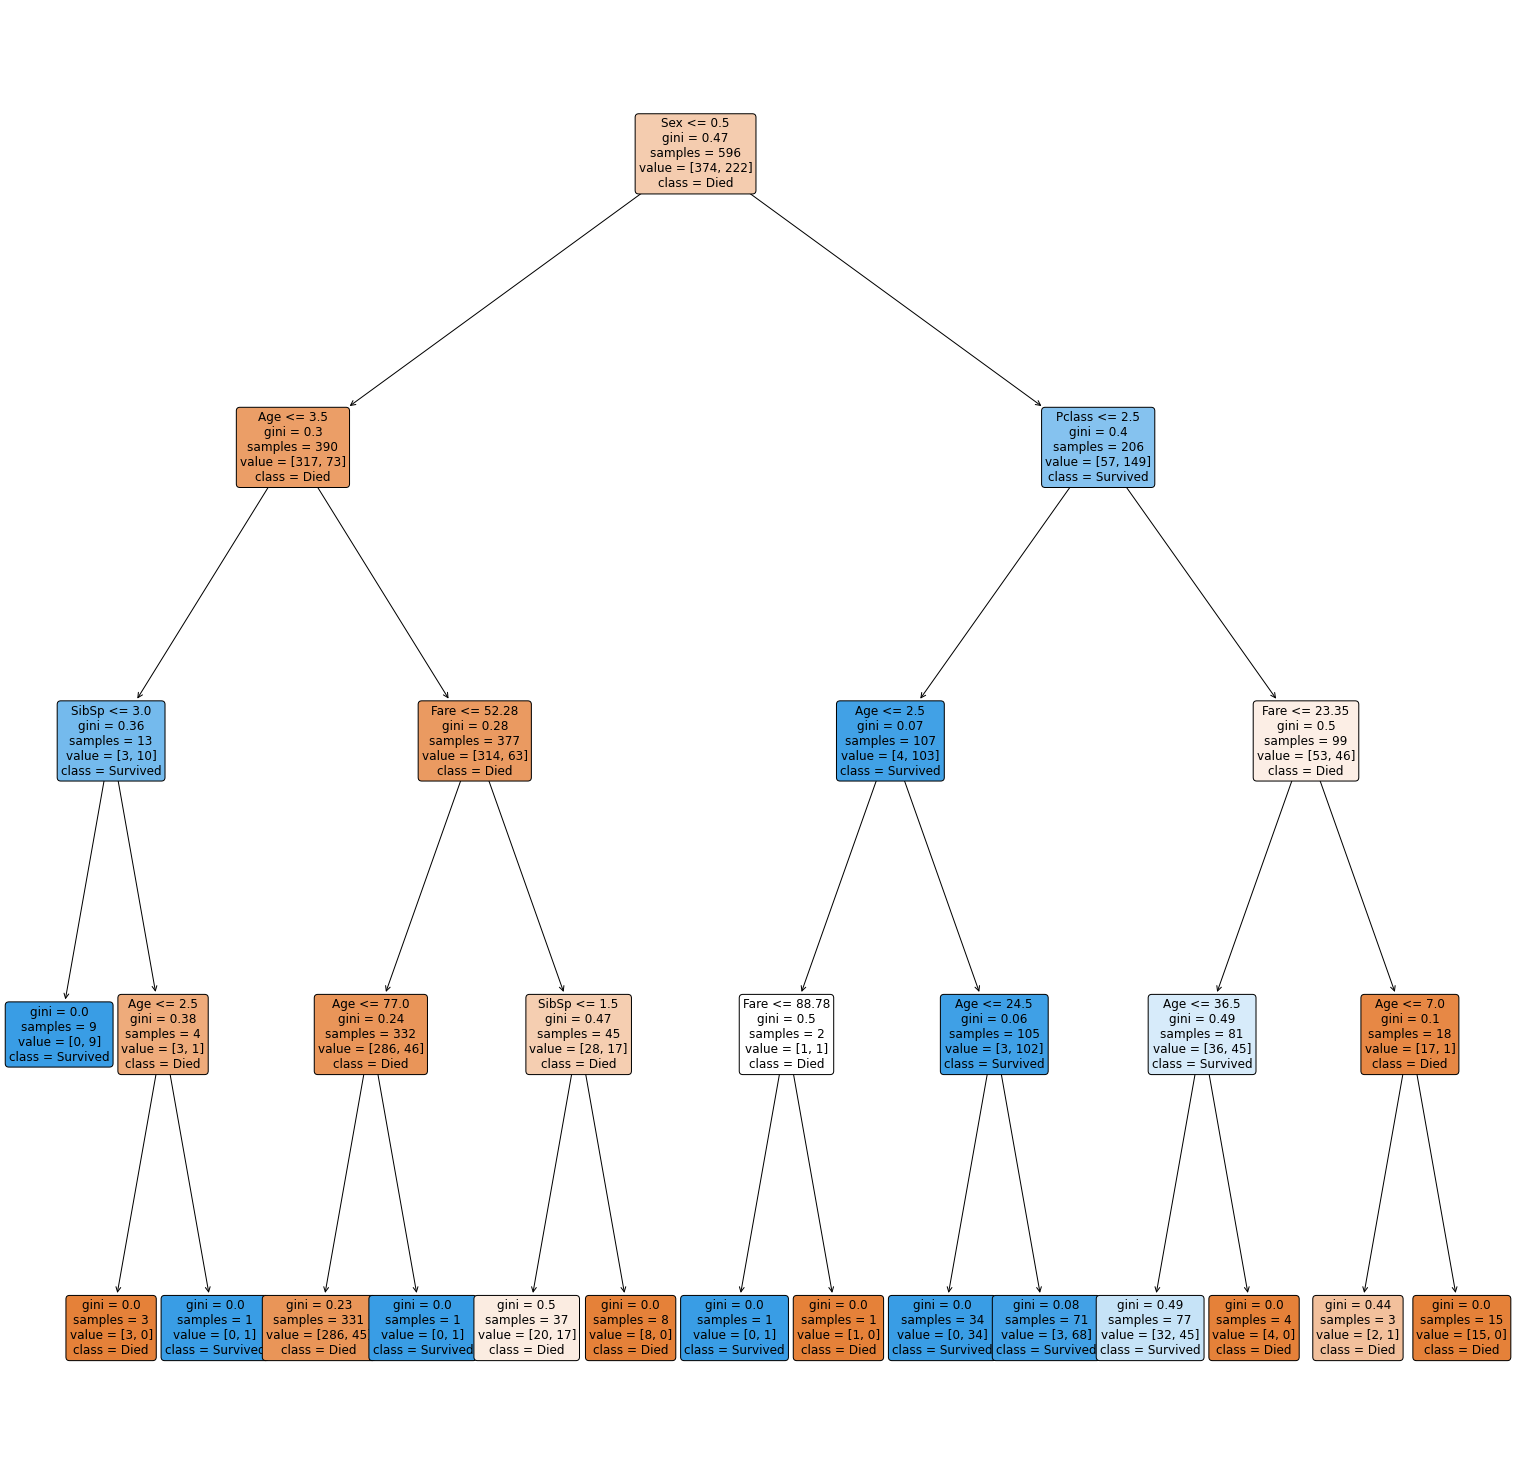

In [170]:
from sklearn import tree
fig = plt.figure(figsize=(27,27))      #setplot size (denoted in inches)
_ = tree.plot_tree(tree_clf, 
                   max_depth=4,
                   feature_names= feature_columns, 
                   class_names={0: 'Died', 1: 'Survived'},
                   label='all',
                   filled=True, 
                   rounded=True, 
                   precision=2, 
                   fontsize=12)
plt.show()
fig.savefig('tree_clf.png')

In [140]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic_tree.dot",
        feature_names= feature_columns,
        class_names='Survived',
        rounded=True,
        filled=True
    )

In [146]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [149]:
titanic_test

array([[ 3.    ,  0.    , 28.    ,  1.    ,  1.    , 15.2458],
       [ 2.    ,  0.    , 31.    ,  0.    ,  0.    , 10.5   ],
       [ 3.    ,  0.    , 20.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    ,  1.    ,  0.    ,  2.    , 15.7417],
       [ 3.    ,  1.    , 28.    ,  0.    ,  2.    , 15.2458],
       [ 3.    ,  0.    , 21.    ,  0.    ,  0.    ,  7.925 ]])

In [153]:
titanic_label_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0])

In [154]:
predictions = tree_clf.predict(titanic_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(titanic_label_test, predictions)

0.823728813559322

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(titanic_label_test, predictions, labels=[0,1])

array([[159,  16],
       [ 36,  84]])

In [161]:
from sklearn.metrics import precision_score
precision_score(titanic_label_test, predictions)

0.84

In [165]:
from sklearn.metrics import classification_report
print(classification_report(titanic_label_test, predictions, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.82      0.91      0.86       175
    Survived       0.84      0.70      0.76       120

    accuracy                           0.82       295
   macro avg       0.83      0.80      0.81       295
weighted avg       0.83      0.82      0.82       295



In [ ]:
tree_clf.predict_proba(titanic_test)

**Evaluation metrics**

Accuracy is not the best performance measure for classification when dealing with skewed datasets (some classes are much more frequent than others). 

If classes are imbalanced, a classifier might classify all the observations as belonging to the majority class. The overall accuracy would be very high, but in more detail the classifier would have a 100% recognition rate for the majority class but a 0% recognition rate for the minority class.

Which other evaluation metrics could be used?

**Save the Model to make future predictions on an unseen test set**

In [315]:
import pickle

In [316]:
# save the model to disk
filename = 'titanic_model.sav'
pickle.dump(optimized_model, open(filename, 'wb'))

---

# Random Forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier
titanic_clf_rf = RandomForestClassifier(n_estimators=10)
titanic_clf_rf = titanic_clf_rf.fit(titanic_train, titanic_label_train)

In [ ]:
from sklearn.model_selection import cross_val_score

In [178]:
titanic_clf_rf.predict(titanic_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [181]:
feature_columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [180]:
titanic_clf_rf.feature_importances_


array([0.08751257, 0.25178948, 0.24849251, 0.05672979, 0.04835445,
       0.30712121])

In [182]:
titanic_clf_rf.estimators_


[DecisionTreeClassifier(max_features='auto', random_state=1245466648),
 DecisionTreeClassifier(max_features='auto', random_state=1679693016),
 DecisionTreeClassifier(max_features='auto', random_state=800074930),
 DecisionTreeClassifier(max_features='auto', random_state=1234918570),
 DecisionTreeClassifier(max_features='auto', random_state=13791845),
 DecisionTreeClassifier(max_features='auto', random_state=970676814),
 DecisionTreeClassifier(max_features='auto', random_state=1760142608),
 DecisionTreeClassifier(max_features='auto', random_state=2104305437),
 DecisionTreeClassifier(max_features='auto', random_state=2107799677),
 DecisionTreeClassifier(max_features='auto', random_state=985427855)]